In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dezzmond","key":"f99337da242887dbdefddf11464ec4e9"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
zeesolver/spotfy                                                Spotify Songs Album                                 47KB  2024-05-10 09:21:57           2514         36  1.0              
rahulvyasm/netflix-movies-and-tv-shows                          Netflix Movies and TV Shows                          1MB  2024-04-10 09:48:38          26243        557  1.0              
khushikhushikhushi/amazon-bestselling-books                     Amazon Bestselling Books                             4KB  2024-05-23 13:59:52            964         26  1.0              
prasad22/vehicle-population-statistics                          V

In [6]:
! kaggle datasets download -d maharshipandya/-spotify-tracks-dataset

Dataset URL: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
License(s): ODbL-1.0
 61% 5.00M/8.17M [00:00<00:00, 33.8MB/s]
100% 8.17M/8.17M [00:00<00:00, 36.7MB/s]


In [7]:
! mkdir spotify

In [8]:
! unzip spotify-tracks-dataset.zip -d spotify # dont forget to rename the file because the file consist "-" dash as first character

Archive:  spotify-tracks-dataset.zip
  inflating: spotify/dataset.csv     


Ridge Regression is a technique used to analyze multiple regression data that exhibit multicollinearity, which occurs when predictor variables are highly correlated. This multicollinearity can lead to unstable estimates of regression coefficients in ordinary least squares (OLS) regression, making them sensitive to small changes in the model or data. Ridge Regression addresses this issue by introducing a regularization term to the loss function used to train the model, which penalizes large coefficients, thereby stabilizing them.

Key Concepts of Ridge Regression:

Regularization: Ridge Regression incorporates a regularization term into the optimization objective, which is essentially a penalty on the size of coefficients. This helps prevent the coefficients from reaching large values, which is a common problem in models suffering from multicollinearity.

Bias-Variance Tradeoff: By introducing bias into the model (through the regularization term), Ridge Regression aims to reduce the variance of the coefficient estimates. This trade-off often leads to a model that generalizes better to unseen data, even though it might not fit the training data as closely as an ordinary least squares model.

Ridge Regression is especially useful when dealing with datasets where predictors are correlated, which can cause ordinary least squares regression to overfit the data and produce unstable coefficient estimates. By choosing an appropriate regularization, practitioners can significantly improve the model's performance and generalizability.

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [10]:
dataset_path = "/content/spotify/dataset.csv"

In [11]:
df = pd.read_csv(dataset_path)

# explore the dataset to understand its structure
# print the first few rows to get an overview of the data
print(df.head())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [12]:
df.head() #print first 5 rows in dataset

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [13]:
df.info() # overall info about the columns - features in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [14]:
df.isnull().sum() # check for null elements in dataset

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [15]:
duplicates = df[df.duplicated()] # check for duplicates

print("Duplicate rows except first occurrence based on all columns:")
print(duplicates)

Duplicate rows except first occurrence based on all columns:
Empty DataFrame
Columns: [Unnamed: 0, track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []

[0 rows x 21 columns]


In [16]:
df = df.drop_duplicates()

In [17]:
df.shape

(114000, 21)

In [18]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [19]:
df = df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], axis=1) # drop unnecessary features in dataset

In [20]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [21]:
# removing the columns resulted in new duplicate values in the dataset, that why we double check for duplicates
duplicates = df[df.duplicated()]

print("Duplicate rows except first occurrence based on all columns:")
print(duplicates)

Duplicate rows except first occurrence based on all columns:
        popularity  duration_ms  explicit  danceability  energy  key  \
28               0       131760     False         0.620   0.309    5   
29               0       131760     False         0.620   0.309    5   
30               0       131760     False         0.620   0.309    5   
31               0       131760     False         0.620   0.309    5   
34               0       259558     False         0.296   0.206    0   
...            ...          ...       ...           ...     ...  ...   
113041           2       205738     False         0.675   0.375    6   
113345          34       265373     False         0.487   0.895   11   
113644          43       274533     False         0.454   0.635   10   
113786          43       235599     False         0.406   0.121    5   
113882          23       266632     False         0.473   0.474    6   

        loudness  mode  speechiness  acousticness  instrumentalness  liven

In [22]:
df = df.drop_duplicates() # drop created duplicates

In [23]:
df.shape # reduced shape of dataset

(106907, 16)

In [24]:
df = df[df['speechiness'] <= 0.7] # update the "speechiness" column

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106053 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        106053 non-null  int64  
 1   duration_ms       106053 non-null  int64  
 2   explicit          106053 non-null  bool   
 3   danceability      106053 non-null  float64
 4   energy            106053 non-null  float64
 5   key               106053 non-null  int64  
 6   loudness          106053 non-null  float64
 7   mode              106053 non-null  int64  
 8   speechiness       106053 non-null  float64
 9   acousticness      106053 non-null  float64
 10  instrumentalness  106053 non-null  float64
 11  liveness          106053 non-null  float64
 12  valence           106053 non-null  float64
 13  tempo             106053 non-null  float64
 14  time_signature    106053 non-null  int64  
 15  track_genre       106053 non-null  object 
dtypes: bool(1), float64(9), i

In [26]:
duplicates = df[df.duplicated()] # triple check for duplicates after modifying the speechiness

print("Duplicate rows except first occurrence based on all columns:")
print(duplicates)

Duplicate rows except first occurrence based on all columns:
Empty DataFrame
Columns: [popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []


In [27]:
# identify numeric and categorical columns
numeric_cols = []
categorical_cols = []
for col in df.columns:
    if df[col].dtype == np.float64 or df[col].dtype == np.int64:
        numeric_cols.append(col)
    else:
        categorical_cols.append(col)

print('numeric columns:', numeric_cols)
print('Categorical columns:', categorical_cols)

numeric columns: ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
Categorical columns: ['explicit', 'track_genre']


Update the discrete_numeric features in dataset


In [28]:
discrete_numeric=[feature for feature in numeric_cols if df[feature].nunique()<20]
discrete_numeric

['key', 'mode', 'time_signature']

In [29]:
df['mode'] = df['mode'].replace({0: 'minor', 1: 'major'})

In [30]:
df['key'] = df['key'].replace({0: 'C', 1: 'C-sharp_D-flat', 2: 'D', 3: 'D-sharp_E-flat', 4: 'E', 5: 'F', 6: 'F-sharp_G-flat', 7: 'G', 8: 'G-sharp_A-flat', 9: 'A', 10: 'A-sharp_B-flat', 11: 'B'})

In [31]:
df = df.loc[df['time_signature'] >= 3]

In [32]:
df['time_signature'] = df['time_signature'].replace({3: '3/4', 4: '4/4', 5: '5/4', 6: '6/4', 7: '7/4'})

In [33]:
df = df[df['duration_ms']!=0]

In [34]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,C-sharp_D-flat,-6.746,minor,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4/4,acoustic
1,55,149610,False,0.420,0.1660,C-sharp_D-flat,-17.235,major,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4/4,acoustic
2,57,210826,False,0.438,0.3590,C,-9.734,major,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4/4,acoustic
3,71,201933,False,0.266,0.0596,C,-18.515,major,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3/4,acoustic
4,82,198853,False,0.618,0.4430,D,-9.681,major,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4/4,acoustic


Analyzing dataset based on the plots

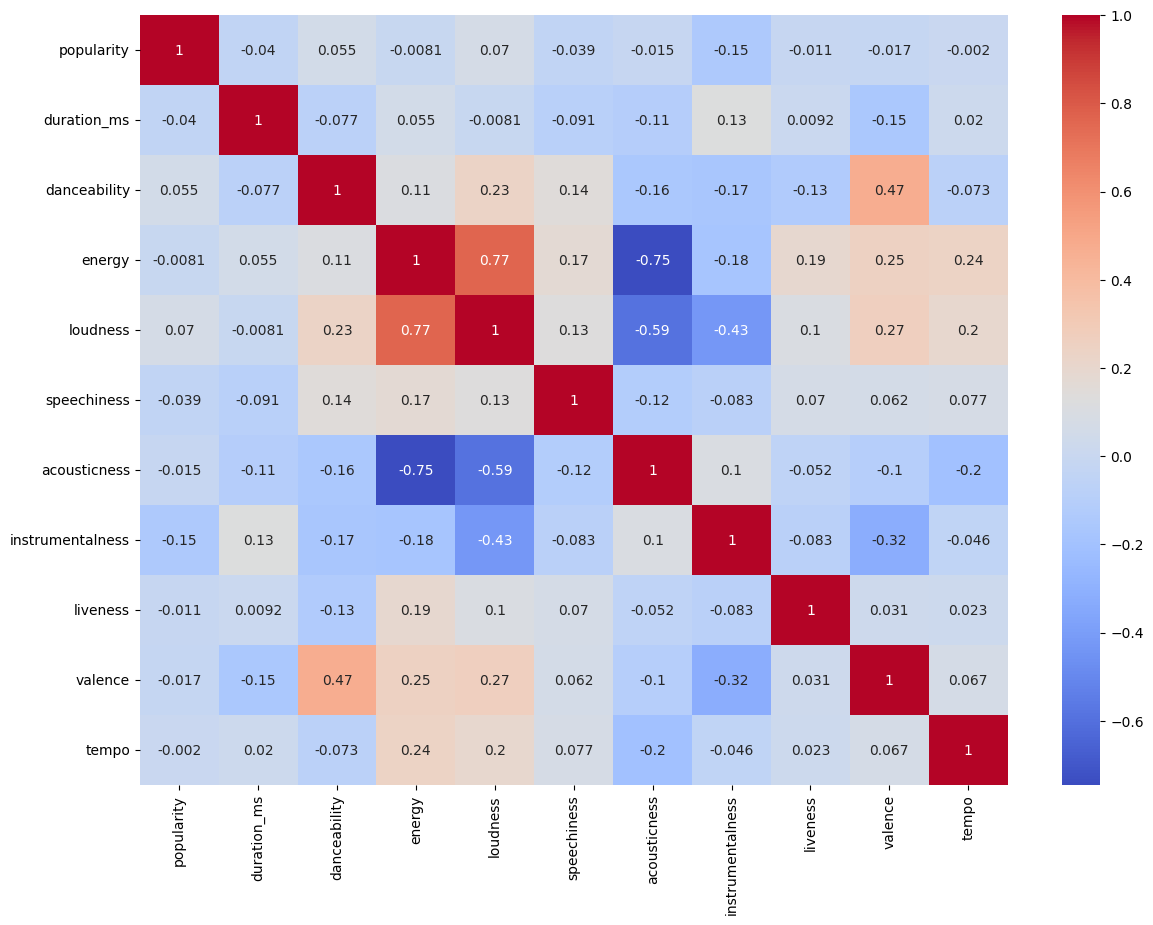

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 10))
#correlation_matrix = df.corr()

# select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
# compute the correlation matrix
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The correlation coefficient values range from -1 to 1, where:

1 indicates a perfect positive linear relationship,
-1 indicates a perfect negative linear relationship,
0 indicates no linear relationship.
By examining the correlation coefficients, we can identify which variables have a strong linear relationship with the target variable (popularity). These variables might be good predictors in regression model.

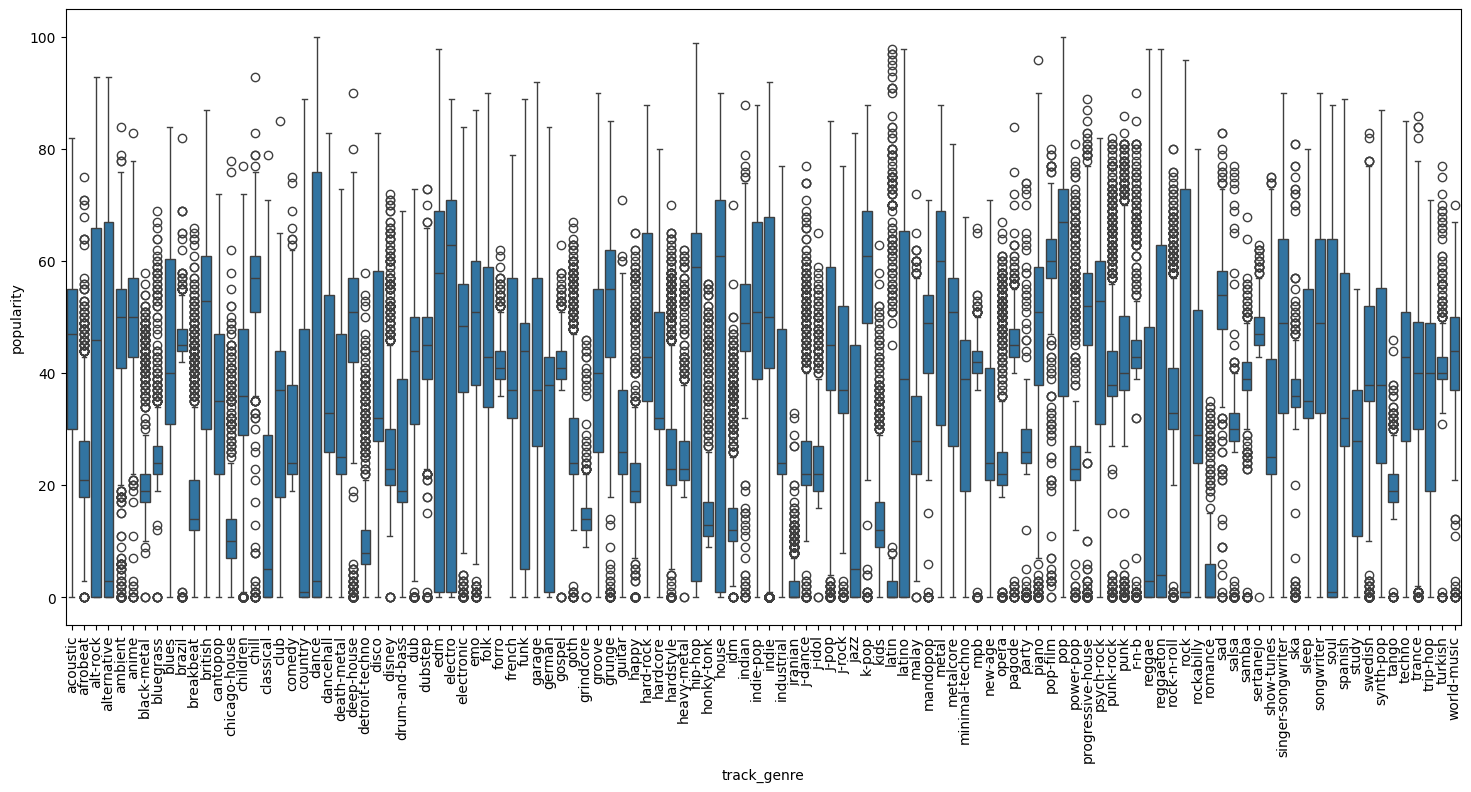

In [36]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='track_genre', y='popularity', data=df)
plt.xticks(rotation=90, fontsize=10)
plt.show()

Box plots can help understand the distribution of target variable across different categories in a categorical feature. For example, to see how popularity varies with track_genre.

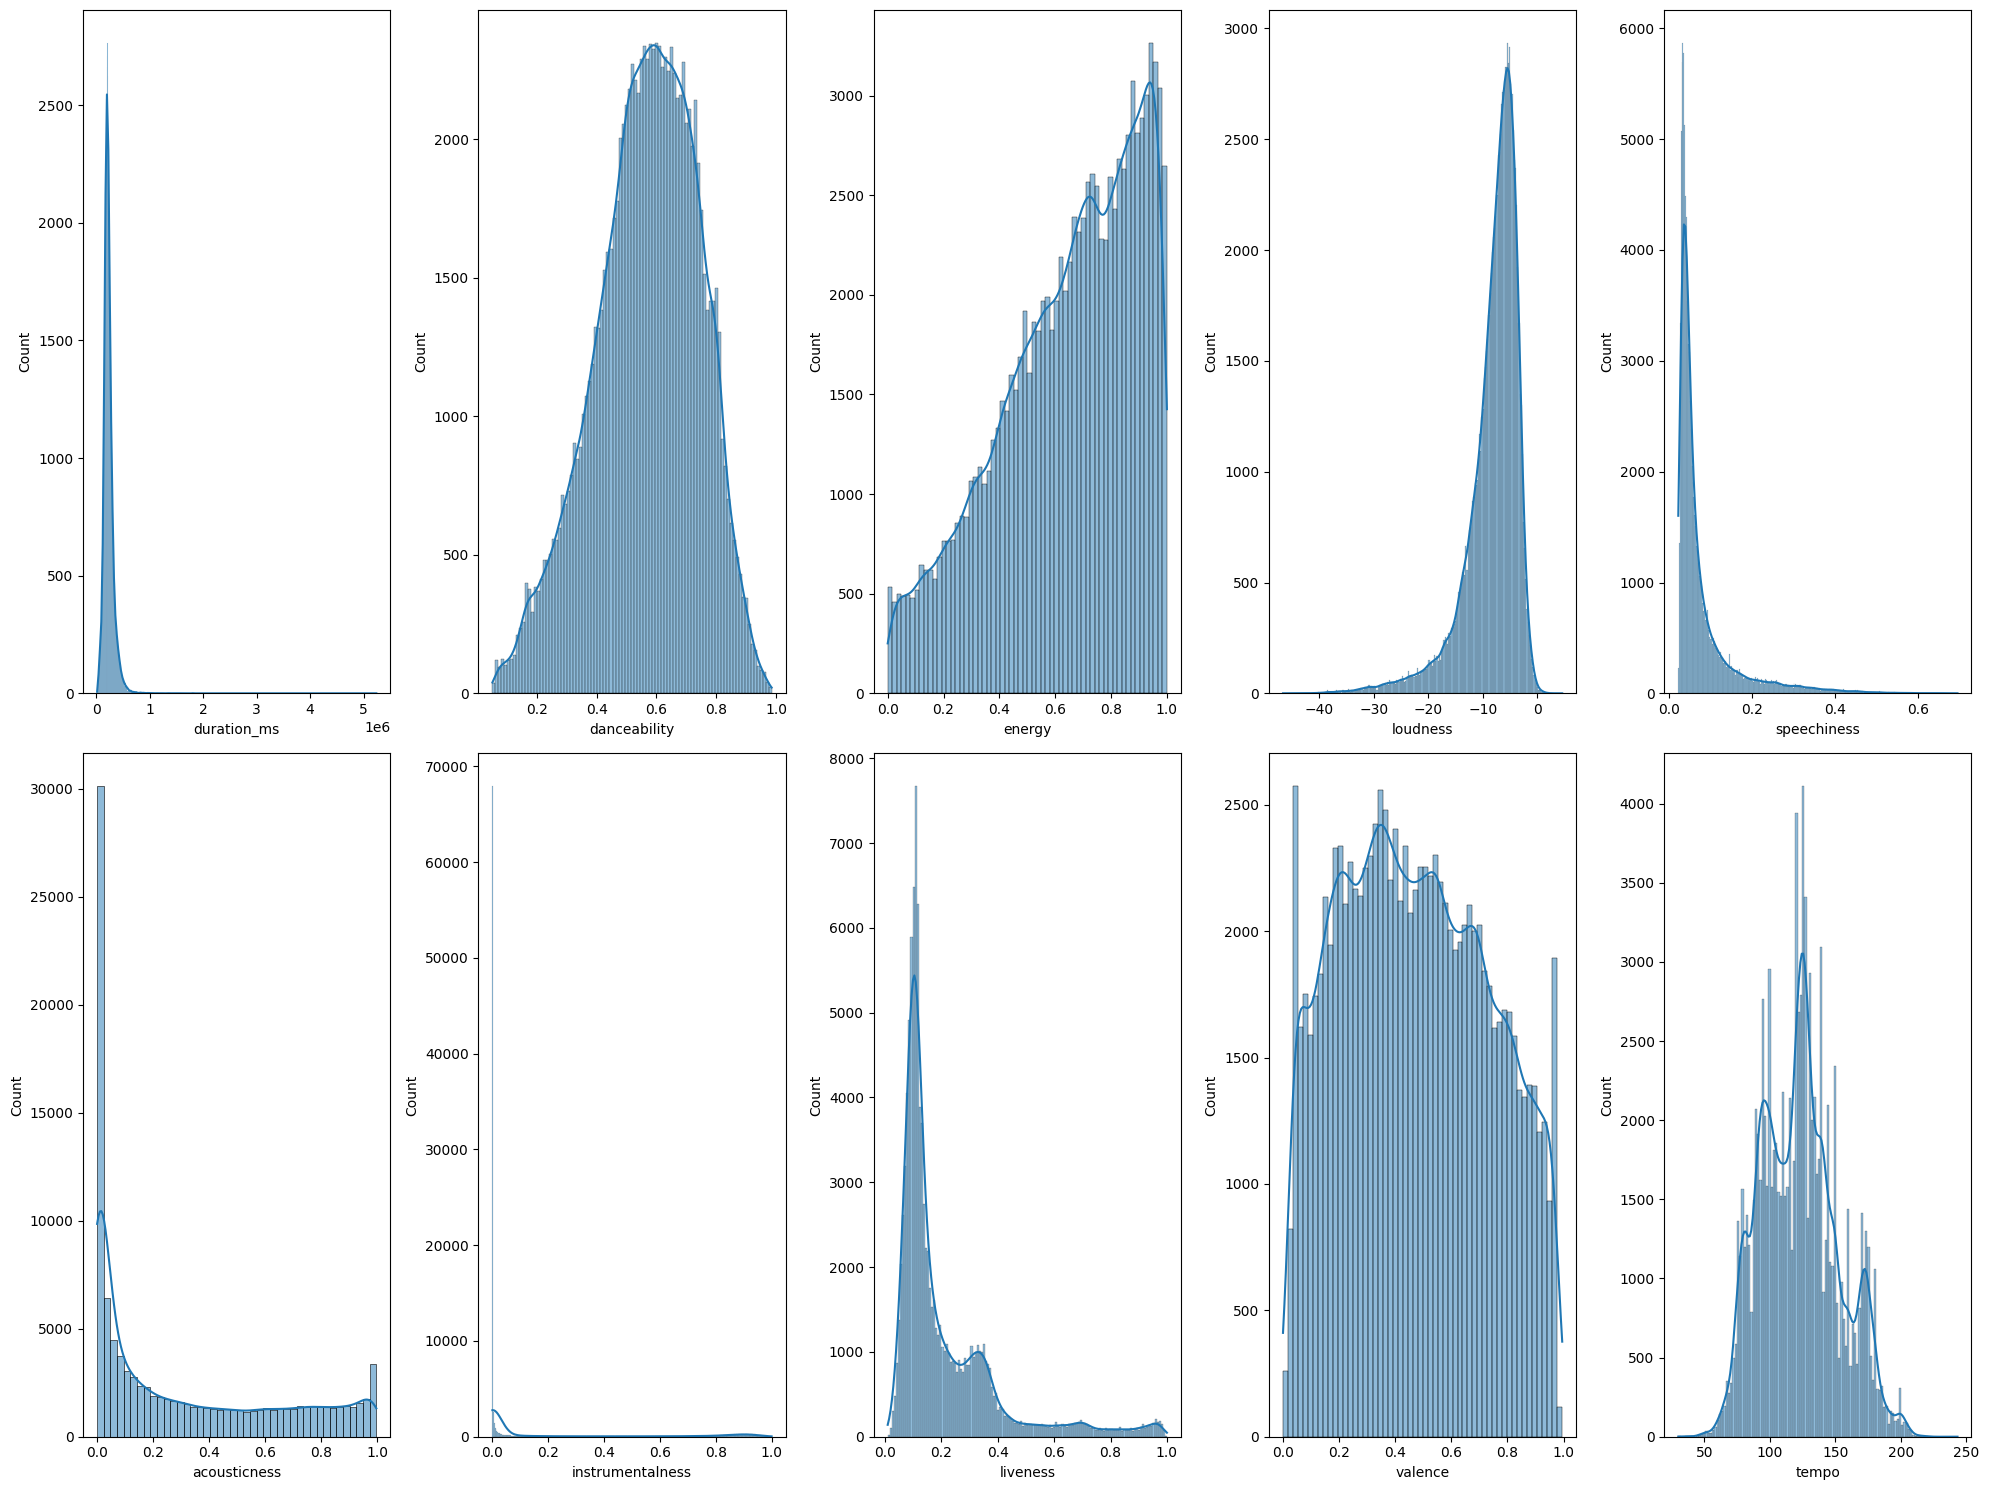

In [37]:
import math

# calculate the number of columns to plot
num_cols_to_plot = len(df.drop(['popularity', 'track_genre', 'key', 'mode', 'time_signature', 'explicit'], axis=1).columns)

# determine the number of rows and columns for the subplot grid
ncols = 5  # You can adjust this number based on your preference
nrows = math.ceil(num_cols_to_plot / ncols)  # Calculate the minimum number of rows needed

# create the subplot grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
# flatten to 1D array for easy indexing
axes = axes.flatten()

# plot each column
for i, col in enumerate(df.drop(['popularity', 'track_genre', 'key', 'mode', 'time_signature', 'explicit'], axis=1).columns):
    sns.histplot(df[col], ax=axes[i], kde=True)

# hide any extra subplots
for ax in axes[i+1:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


Understanding the distribution of numerical features can be helpful, especially to identify features that might need scaling or normalization. Ridge Regression, like other linear models, can benefit from features being on a similar scale.

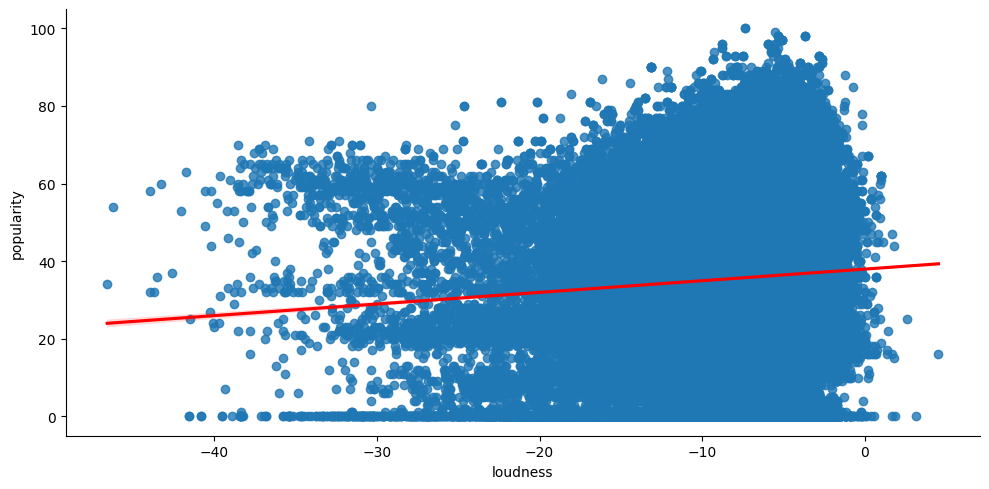

In [38]:
# example for 'loudness' feature
sns.lmplot(x='loudness', y='popularity', data=df, aspect=2, line_kws={'color': 'red'})
plt.show()

For key features identified from the correlation heatmap or pair plots, create scatter plots against the target variable to visualize the linear relationship. Adding a line of best fit will help understand how well a linear model might perform.

In [39]:
numeric_cols = []
categorical_cols = []
for col in df.columns:
    if df[col].dtype == np.float64 or df[col].dtype == np.int64:
        numeric_cols.append(col)
    else:
        categorical_cols.append(col)

print('numeric columns:', numeric_cols)
print('Categorical columns:', categorical_cols)

numeric columns: ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
Categorical columns: ['explicit', 'key', 'mode', 'time_signature', 'track_genre']


In [40]:
df.dropna(inplace=True)

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time


# extract numerical features and target variable
numerical_features = df.select_dtypes(include=[np.number])
X_numerical = numerical_features.drop("popularity", axis=1)
y_numerical = numerical_features["popularity"]

In [42]:
print(X_numerical.isnull().sum())  # Check for NaN in features
print(y_numerical.isnull().sum())  # Check for NaN in target variable

X_numerical.fillna(X_numerical.mean(), inplace=True)
y_numerical.fillna(y_numerical.mean(), inplace=True)

duration_ms         0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64
0


In [43]:
numerical_features.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,73,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,55,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,57,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,71,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,82,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949


In [44]:
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_numerical, y_numerical, test_size=0.2, random_state=42)

# train Ridge regression model
ridge_model_num = Ridge(alpha=1.0)
ridge_model_num.fit(X_train_num, y_train_num)

# perform cross-validation
cv_scores_num = cross_val_score(ridge_model_num, X_numerical, y_numerical, cv=5, scoring='neg_mean_squared_error')
cv_rmse_num = np.sqrt(-cv_scores_num)

# evaluate model on the test set
y_pred_num = ridge_model_num.predict(X_test_num)
mse_num = mean_squared_error(y_test_num, y_pred_num)
rmse_num = np.sqrt(mse_num)

print("Numerical Features based on Ridge Library:")
print(f"CV RMSE: {cv_rmse_num.mean()}")
print(f"Test RMSE: {rmse_num}")

Numerical Features based on Ridge Library:
CV RMSE: 21.217007844630853
Test RMSE: 20.95300050815069




---



1. In the MyRidgeRegression class, the cost function was integrated to assess the performance of the regression model during training. It measures how well the model's predictions match the actual data, incorporating a regularization term to prevent overfitting. Monitoring the cost function helps to figure out whether the model is learning correctly.

2. Added time.time() to measure the time taken for both gradient descent and closed-form solutions.

3. The folowing steps ensure there is no data leakage during the feature scaling process:

3.1 Data Splitting:
The dataset is split into training and test sets before any scaling to prevent data leakage.

3.2 Feature Scaling: StandardScaler is fit on the training data only. The trained scaler is then used to transform both the training and test sets.

3.3 Training and Evaluation: Both closed-form and gradient descent methods are used to train the model.
Root Mean Squared Error (RMSE) is calculated and printed for both methods.




---



In [45]:
class MyRidgeRegression:
    # initialize the regression model with hyperparameters
    def __init__(self, alpha=1.0, num_iters=100, learning_rate=0.01, method='closed_form'):
        self.alpha = alpha # regularization strength
        self.num_iters = num_iters # number of iterations to run gradient descent
        self.learning_rate = learning_rate # step size for each iteration of gradient descent
        self.method = method  # method: 'closed_form' or 'gradient_descent'
        self.theta = None # model's weight

    # add column of ones to the dataset to accommodate the intercept term in the linear model.
    def add_intercept(self, X):
        return [[1] + row for row in X]

    # calculate the dot product of two vectors.
    def dot(self, x, y):
        return sum(a * b for a, b in zip(x, y))

    # perform matrix-vector multiplication.
    def mat_vec_dot(self, X, y):
        return [self.dot(row, y) for row in X]

    # transpose a matrix, flipping rows with columns.
    def transpose(self, X):
        return [list(col) for col in zip(*X)]

    # perform matrix-matrix multiplication
    def mat_mult(self, A, B):
        return [[self.dot(row, col) for col in zip(*B)] for row in A]

    # perform matrix-matrix addition
    def mat_add(self, A, B):
        return [[a + b for a, b in zip(rowA, rowB)] for rowA, rowB in zip(A, B)]

    def compute_cost(self, X, y, theta):
        # compute the cost function (mean squared error + regularization term)
        m = len(y) # calculate the number of samples in the target vector y
        predictions = self.mat_vec_dot(X, theta) # computes the predicted values for each sample
        # calculates the error for each prediction by subtracting the actual target value from the predicted value, resulting in list of errors.
        errors = [pred - actual for pred, actual in zip(predictions, y)]
        # computes the mean squared error (MSE)
        cost = np.sum([error ** 2 for error in errors]) / (2 * m)
        # calculates the regularization term to penalize large coefficients, excluding the intercept term (theta[0]) to prevent overfitting
        regularization = (self.alpha / (2 * m)) * sum([t ** 2 for t in theta[1:]])
        return cost + regularization # returns the total cost, which is the sum of the MSE and the regularization term

    def fit(self, X, y):
        if self.method == 'gradient_descent':
            self._fit_gradient_descent(X, y)
        else:
            self._fit_closed_form(X, y)

    def _fit_gradient_descent(self, X, y):
        # determine the size of dataset
        m, n = len(X), len(X[0])

        # initialize theta with size n+1 for intercept (model weights as zeros)
        self.theta = [0] * (n + 1)

        # add intercept term
        X = self.add_intercept(X)

        # start time for performance measurement
        start_time = time.time()

        # gradient descent loop starts
        for iteration in range(self.num_iters):

            # calculate predictions
            predictions = self.mat_vec_dot(X, self.theta)

            # compute error vector
            errors = [pred - actual for pred, actual in zip(predictions, y)]

            # calculate gradients
            gradients = self.mat_vec_dot(self.transpose(X), errors)

            #cost = sum(error**2 for error in errors) / (2 * m) # calculate the cost, including the regularization term (old solution)

            # update theta with regularization, avoiding the intercept term for regularization
            for i in range(len(self.theta)):
                regularization = self.alpha * self.theta[i] if i > 0 else 0
                # use sum of errors for intercept gradient
                gradient = gradients[i] if i < len(gradients) else sum(errors)
                self.theta[i] -= self.learning_rate * (gradient / m + regularization / m)

            # monitor the progress
            if iteration == 0 or iteration == self.num_iters - 1:
                cost = self.compute_cost(X, y, self.theta)
                print(f"Iteration {iteration}: Cost = {cost}")

        end_time = time.time()  # end time for performance measurement
        print(f"Gradient Descent Time: {end_time - start_time} seconds")


    def _fit_closed_form(self, X, y):
        # add intercept term to feature matrix X
        X = self.add_intercept(X)

        # convert target values y into column vector
        y = [[yi] for yi in y]

        # start time for performance measurement
        start_time = time.time()

        # transpose the feature matrix X
        XT = self.transpose(X)

        # compute the dot product of XT and X
        XTX = self.mat_mult(XT, X)

        # adds the regularization term (alpha) to the diagonal elements of the product matrix XTX to prevent overfitting
        identity_matrix = [[self.alpha if i == j else 0 for j in range(len(XTX))] for i in range(len(XTX))]
        XTX = self.mat_add(XTX, identity_matrix)

        #we can use this code of adding alpha:
        #for i in range(len(XTX)):
        #    XTX[i][i] += self.alpha

        # compute the dot product of XT and y
        XTy = self.mat_mult(XT, y)

        # compute the inverse of matrix using numpy
        def inverse(matrix):
            return np.linalg.inv(matrix).tolist()

        # compute the closed-form solution for theta
        self.theta = self.mat_mult(inverse(XTX), XTy)

        # flatten the theta matrix to get the coefficients as a list
        self.theta = [theta[0] for theta in self.theta]

        # optimized solution self.theta
        #self.theta = [theta[0] for theta in self.mat_mult(inverse(XTX), XTy)]

        # end time for performance measurement
        end_time = time.time()

        # compute and print the cost for the closed-form solution
        cost = self.compute_cost(X, [yi[0] for yi in y], self.theta)
        print(f"Closed-form solution: Cost = {cost}")
        print(f"Closed-form Solution Time: {end_time - start_time} seconds")

    # predict function to make predictions on new data
    def predict(self, X):
        X = self.add_intercept(X) # add intercept to new data
        return self.mat_vec_dot(X, self.theta) # return the predicted values

alpha: The alpha parameter controls the regularization strength in Ridge Regression. Regularization is technique used to prevent overfitting by penalizing large coefficients in the model. Without regularization, model might fit the training data too closely, capturing noise in the training data as if it were true signal. This can lead to poor generalization performance on unseen data. By adjusting alpha, we can control the trade-off between fitting the training data well and keeping the model coefficients small, which helps improve the model's generalization ability.

num_iters: The number of iterations for which the gradient descent optimization algorithm will run. During each iteration, gradient descent updates the model's coefficients (weights) in an attempt to minimize the loss function. The number of iterations determines how long the algorithm will try to optimize the coefficients. Too few iterations might result in an under-optimized model, while too many iterations can lead to wasted computational resources and, in some cases, overfitting if the learning rate is not appropriately adjusted.

learning_rate: The learning rate controls how much we adjust the model's weights with respect to the loss gradient for each iteration. It essentially sets the step size of the updates during the optimization process. The learning rate is critical for the convergence of gradient descent. If it's too high, the algorithm might overshoot the minimum and diverge. If it's too low, the algorithm will converge very slowly, requiring more iterations to reach an optimal solution.

self.theta: placeholder for the model coefficients, initially set to ‘None’. This represents the coefficients or weights assigned to each feature in the dataset, including the intercept. The values in theta determine the influence of each feature on the prediction. The model's weights are what the learning algorithm is trying to optimize. They are central to the model's predictions, as they quantify the relationship between each feature and the target variable. The learning process involves adjusting these weights to minimize the loss function, which includes both the fit to the data and the regularization term.


In [46]:
from sklearn.preprocessing import StandardScaler

X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_numerical, y_numerical, test_size=0.2, random_state=42)

# create instance of 'StandardScaler()'
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num).tolist()
X_test_num_scaled = scaler.transform(X_test_num).tolist()

# initialize and train the custom Ridge Regression model
ridge_model_num = MyRidgeRegression(alpha=1.0, method='closed_form')

# adjusts the model's weights based on input data, learning to predict the target variable
ridge_model_num.fit(X_train_num_scaled, y_train_num)

Closed-form solution: Cost = 221.1065497026199
Closed-form Solution Time: 7.468790531158447 seconds


Different features in dataset can be on entirely different scales. For example, a feature representing "age" might range from 0 to 100, while another feature representing "annual income" could range from thousands to millions. Such disparity in scales can cause machine learning algorithms to weigh larger values more heavily than smaller ones, skewing the learning process. StandardScaler transforms each feature to have mean of 0 and standard deviation of 1, ensuring uniformity in scale across features.

In [47]:
# predict the popularity label by ridge regression
y_pred_num = ridge_model_num.predict(X_test_num_scaled)

# calculate root-mean-square-error
mse_num = mean_squared_error(y_test_num, y_pred_num)
rmse_num = np.sqrt(mse_num)
print(f"Test RMSE: {rmse_num}")

Test RMSE: 20.95303014402734


In [48]:
from sklearn.metrics import mean_squared_error # import function to calculate the mean squared error, measure of model performance
from sklearn.model_selection import KFold # cross-validator that divides into K consecutive folds

# initializes a Kfold instance with 5 splits, enabling shuffling of data before splitting
# (good for randomizing the data points) and setting a random state for reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# initializes an empty list to store the mean squared errors from each fold
cv_scores_num = []

# Extract numerical features and target variable
numerical_features = df.select_dtypes(include=[np.number])
X_numerical = numerical_features.drop("popularity", axis=1)
y_numerical = numerical_features["popularity"]

# initialize fold counter
fold_number = 1

# iterate over the indices for training and validation sets generated by splitting the scaled numerical features X_numerical_scaled using Kfold
for train_index, val_index in kf.split(X_numerical):
    print(f"Processing fold {fold_number}...")
    #X_train_cv, X_val_cv = X_numerical_scaled[train_index], X_numerical_scaled[val_index] # Assigns the training and validation sets for features based on indices for the current fold
    X_train_cv, X_val_cv = X_numerical.iloc[train_index], X_numerical.iloc[val_index]
    y_train_cv, y_val_cv = y_numerical.iloc[train_index], y_numerical.iloc[val_index]

    # checks if y_numerical is a pandas Series and splits the targets for training and validation sets accordingly (ensures compatibility with different data structures)
    #if isinstance(y_numerical, pd.Series):
    #    y_train_cv, y_val_cv = y_numerical.iloc[train_index], y_numerical.iloc[val_index]
    #else:
    #    y_train_cv, y_val_cv = y_numerical[train_index], y_numerical[val_index]

    # scale features within the fold
    scaler = StandardScaler()
    X_train_cv_scaled = scaler.fit_transform(X_train_cv).tolist()
    X_val_cv_scaled = scaler.transform(X_val_cv).tolist()

    # instantiates the custom Ridge Regression model with specified alpha (regularization strength),
    # dont forget to choose the method 'gradient_descent' or closed_form
    model_cv = MyRidgeRegression(alpha=1.0, method='closed_form')
    model_cv.fit(X_train_cv_scaled, y_train_cv)

    y_pred_cv = model_cv.predict(X_val_cv_scaled)

    # ensure there are no NaN values in predictions
    if np.isnan(y_pred_cv).any():
        print("NaN values found in predictions")
        continue

    # computes the mean squared error between the true values and predictions for the validation set
    mse_cv = mean_squared_error(y_val_cv, y_pred_cv)

    # appends the computed mean squared error to the list of cross-validation scores
    cv_scores_num.append(mse_cv)

    # increment fold counter
    fold_number += 1

# computes the root mean squared error across all folds by taking the square root of the average of the mean squared errors
cv_rmse_num = np.sqrt(np.mean(cv_scores_num))
print("Cross-Validation RMSE:", cv_rmse_num)

Processing fold 1...
Closed-form solution: Cost = 221.1065497026199
Closed-form Solution Time: 4.668676376342773 seconds
Processing fold 2...
Closed-form solution: Cost = 221.18543023194067
Closed-form Solution Time: 4.179661750793457 seconds
Processing fold 3...
Closed-form solution: Cost = 220.09638599778995
Closed-form Solution Time: 4.9817140102386475 seconds
Processing fold 4...
Closed-form solution: Cost = 220.98597736383618
Closed-form Solution Time: 4.1445043087005615 seconds
Processing fold 5...
Closed-form solution: Cost = 220.5069983911736
Closed-form Solution Time: 4.344835519790649 seconds
Cross-Validation RMSE: 21.016144984269825


Gradient Descent Solution:
1. Cost at Initial Iteration (0): Around 845-848 across all folds, indicating a high initial error.
2. Cost at Final Iteration (99): Around 306-307, showing significant error reduction after 100 iterations.
3. Gradient Descent Time: Approximately 53-55 seconds per fold, indicating the computational effort required for iterative optimization.
4. Cross-Validation RMSE: 24.78
5. Test RMSE: 24.63

Closed-Form Solution:
1. Cost: Consistently around 220-221 across all folds, indicating a lower and more stable error.
2. Closed-Form Solution Time: 4.5-8.3 seconds per fold, significantly faster than gradient descent.
3. Cross-Validation RMSE: 21.02
4. Test RMSE: 20.95

Performance Assessment:
1. Accuracy: The closed-form solution has a lower RMSE both in cross-validation (21.02) and test set (20.95) compared to gradient descent (24.78 and 24.63). This indicates better predictive performance.
2. Computational Efficiency: The closed-form solution is much faster (4.5-8.3 seconds per fold) than gradient descent (53-55 seconds per fold), making it more efficient for this dataset.

Theoretical Justification:
1. Closed-Form Solution:

1.1 The closed-form solution directly solves the normal equation, θ = (XTX + αI)^-1 * XTy, which ensures the global minimum of the cost function. This guarantees optimal coefficients in one step, leading to more accurate and consistent results.

1.2 Ridge regression incorporates a regularization term (αI) to penalize large coefficients, which helps in preventing overfitting and improves generalization. The closed-form solution handles this elegantly by adding αI directly to XTX.

2. Gradient Descent:

2.1 Gradient descent is an iterative optimization algorithm that updates coefficients step-by-step using the gradient of the cost function. The learning rate (η) and number of iterations determine the convergence speed and accuracy. In this case, even after 100 iterations, it does not achieve the global minimum as effectively as the closed-form solution.

2.2 The performance of gradient descent is sensitive to the learning rate. If the learning rate is too high, the algorithm may overshoot the minimum, while if it is too low, convergence can be very slow.

2.3 Gradient descent approximates the solution, and depending on the complexity of the data and the cost surface, it might get stuck in local minima or take many iterations to approach the global minimum.

3. Computational Complexity of two solutions:

3.1 The closed-form solution involves matrix inversion, which has a time complexity of O(n^3) for nxn matrices. For large datasets, this can be computationally expensive, but it's one-time computation. Ideal for small to medium-sized datasets where the inversion of XTX is computationally feasible like in our case.

3.2 Gradient descent has a time complexity of O(knm), where  k is the number of iterations, n is the number of features, and m is the number of samples. While each iteration is cheaper, it requires multiple iterations to converge. Preferred for very large datasets where computing the closed-form solution is impractical due to memory constraints or computational cost.

In summary, the closed-form solution's superior performance in both accuracy and computational efficiency in this scenario is due to its ability to directly minimize the cost function and effectively incorporate regularization, whereas gradient descent provides an iterative approximation that may not fully converge within the given iterations.



---



In [49]:
min_value = y_numerical.min()
max_value = y_numerical.max()

print(f"Minimum value of the target variable: {min_value}")
print(f"Maximum value of the target variable: {max_value}")

Minimum value of the target variable: 0
Maximum value of the target variable: 100


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numerical_features = X_numerical.columns.tolist()

categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_features

['explicit', 'key', 'mode', 'time_signature', 'track_genre']

In [51]:
numerical_features

['duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [52]:
# ColumnTransformer allows to specify which transformations to apply to which columns in dataset
preprocessor = ColumnTransformer(
    # define the list of transformers - each transformer is tuple containing name, object and list of column names or indices that the transformer should be applied to
    transformers=[
        ('num', StandardScaler(), numerical_features), # transformer for numerical features of the dataset
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # transformer for categorical features of the dataset (converts categorical variables into a form that could be provided to ML algorithms to do prediction)
    ])

In [53]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df.drop("popularity", axis=1), df["popularity"], test_size=0.2, random_state=42) # first split the dataset into train and test then scale

In [54]:
# just to show preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train_cat)
X_test_preprocessed = preprocessor.transform(X_test_cat)

print(X_train_cat.shape)
print(X_train_preprocessed.shape)
print(type(X_train_preprocessed))
print(X_test_cat.shape)
print(X_test_preprocessed.shape)
print(type(X_test_preprocessed))

(84019, 15)
(84019, 143)
<class 'scipy.sparse._csr.csr_matrix'>
(21005, 15)
(21005, 143)
<class 'scipy.sparse._csr.csr_matrix'>


In [55]:
print(y_train_cat.shape)

(84019,)




---



Here are the key aspects that require attention:
1. In ridge regression, we add regularization term to the cost function to prevent overfitting by penalizing large coefficients. This regularization term is applied to all coefficients, including the intercept term. However, the intercept term should not be regularized because it is not part of the feature space and does not influence the model complexity. By subtracting self.alpha from the top-left element of matrix A, we ensure that the intercept term is excluded from regularization.

2. In the fit_closed_form method implemented before, the regularization term is added manually through the creation of an identity matrix. This ensures that the regularization term is added to the diagonal elements of XTX, excluding the intercept term from regularization since XTX[0][0] remains unchanged by this specific process.

3. 'gradients = X.T.dot(errors) + self.alpha * np.r_[0, self.theta[1:]]'v: Computes the gradients of the cost function with respect to each coefficient. Regularization '(self.alpha * np.r_[0, self.theta[1:]])' is added to the gradients of all coefficients except the intercept. 'np.r_[0, self.theta[1:]]' ensures that the intercept term is not regularized.

4. The to_dense transformer in the pipeline is used to convert sparse matrices to dense arrays. This step can be necessary when your custom MyRidgeRegression implementation does not support sparse matrices, and some preprocessing steps may produce sparse outputs.

5. Computing the cost in machine learning models like ridge regression serves several important purposes:

5.1 Performance Evaluation: The cost function provides a measure of how well the model is performing. It quantifies the difference between the predicted values and the actual values, typically using mean squared error (MSE).

5.2 Model Optimization: During training, especially in gradient descent, the cost function is used to adjust the model parameters (weights) to minimize the cost. This process iteratively improves the model's accuracy.

5.3 Regularization: In ridge regression, the cost function includes a regularization term that helps prevent overfitting by penalizing large coefficients. This helps to improve the model's generalizability to new data.

By computing and monitoring the cost, we can ensure that the model is learning correctly, adjust hyperparameters, and select the best model configuration.



---



In [56]:
# rewrite myRidgeRegg class using np library in order to improve performance (creation of sparse matrixm working with category features)
class MyRidgeRegression:
    def __init__(self, alpha=1.0, num_iters=100, learning_rate=0.01, method='closed_form'):
        self.alpha = alpha
        self.num_iters = num_iters
        self.learning_rate = learning_rate
        self.method = method
        self.theta = None

    # compute the cost function (mean squared error + regularization term)
    def compute_cost(self, X, y, theta):

        # calculate the number of samples in the target vector y for normalization
        m = len(y)

        # calculates the predicted values and resulting vector contains the predicted values for each sample based on the current model parameters
        predictions = X.dot(theta)

        # compute the difference between predictions and actual target values
        errors = predictions - y

        # mean squared error
        cost = np.sum(errors ** 2) / (2 * m)

        # regularization term
        regularization = (self.alpha / (2 * m)) * np.sum(theta[1:] ** 2)
        return cost + regularization  # total cost including regularization

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        if self.method == 'gradient_descent':
            self._fit_gradient_descent(X, y)
        else:
            self._fit_closed_form(X, y)

    def _fit_gradient_descent(self, X, y):

        # retrieves the number of samples m and features n from input data X
        m, n = X.shape

        # creates column vector of ones that will serve as intercept term (allows the model to fit not just through the origin)
        intercept = np.ones((m, 1))

        # horizontally stacks the intercept term with the original feature matrix, adding intercept term to X
        X = np.hstack([intercept, X])

        # initializes the model coefficients to zeros (there are n+1 coefficients because of added intercept term)
        self.theta = np.zeros(n + 1)

        # start time for performance measurement
        start_time = time.time()

        for iteration in range(self.num_iters):

            # calculate predictions using current coefficients by multiplying the feature matrix X with coefficients vector self.theta
            predictions = X.dot(self.theta)

            # computes the difference between predictions and actual target values
            errors = predictions - y

            # calculates the gradient of the cost function with respect to each coefficient (regularixaition term is added to the gradients of all coefficients except for intercept (exclude the interecept from regularization))
            gradients = X.T.dot(errors) + self.alpha * np.r_[0, self.theta[1:]]

            # updates the coefficients in the direction that minimally reduces the cost function, scaled by the learning rate (division by m normalizes the step size)
            self.theta -= (self.learning_rate / m) * gradients

            # monitor the progress
            if iteration == 0 or iteration == self.num_iters - 1:
              cost = self.compute_cost(X, y, self.theta)
              print(f"Iteration {iteration}: Cost = {cost}")

        # end time for performance measurement
        end_time = time.time()
        print(f"Gradient Descent Time: {end_time - start_time} seconds")

    def _fit_closed_form(self, X, y):
        m, n = X.shape # get the number of samples and features
        intercept = np.ones((m, 1)) # create column vector of ones for the intercept term
        X = np.hstack([intercept, X]) # add intercept term to the feature matrix

        # start time for performance measurement
        start_time = time.time()

        # compute matrix A = X^T * X + alpha * I and np.eye(n + 1) creates identity matrix of size (n+1), ensuring regularization is applied to all coefficients except the intercept
        A = X.T.dot(X) + self.alpha * np.eye(n + 1)

        # adjust for not regularizing the intercept term, the top-left element of A is reduced by self.alpha, so the intercept term is not regularized
        A[0, 0] -= self.alpha

        # compute the vector b = X^T * y
        b = X.T.dot(y)

        # compute the closed-form solution for theta = inv(A) * b, it first computes the inverse of matrix A and then takes the dot product with vector b.
        self.theta = np.linalg.inv(A).dot(b)

        # end time for performance measurement
        end_time = time.time()

        cost = self.compute_cost(X, y, self.theta)
        print(f"Closed-form solution: Cost = {cost}")
        print(f"Closed-form Solution Time: {end_time - start_time} seconds")

    def predict(self, X):
        intercept = np.ones((X.shape[0], 1))
        # add intercept term to new feature matrix
        X = np.hstack([intercept, X])
        return X.dot(self.theta) # returns predictions by multiplying the new feature matrix (with intercept) by the model's coefficients

Differences between two implementation of Ridge Regression:

1. Custom implementation of MyRidgeRegression class uses Python built-in functions and manual implementations of matrix operations, which can be slower and less efficient. The second implementation of MyRidgeRegression class (because of working with sparse matrices (OneHotEncoder <- "category" features)) uses NumPy's optimized linear algebra routines, resulting in faster computations.

2. NumPy implementation directly uses X.dot(theta) for predictions, benefiting from NumPy's optimized operations. Custom implementation uses mat_vec_dot for matrix-vector multiplication or other methods, which is manually implemented.

3. Gradient Descent in the custom implementation, iterative updates are manually implemented using Python loops. in the Numpy implementation, iterative updates are handled using NumPy, making the operations faster.

4. Closed-form solution in the custom implementation, manually implements matrix inversion and multiplication. Numpy uses Uses np.linalg.inv and np.dot for efficient matrix operations.

NumPy significantly reduces computation time and simplifies the code, making it easier to maintain and less prone to errors, especially working with **sparse matrices** (large datasets).




One more benefit of using NumPy in gradient descent solution or why np library is used:

In the manual implementation, operations such as updating the model's weights (theta) are performed iteratively through explicit loops. Each weight in theta is updated one at a time within a loop. This approach is required because
1. Each element of theta needs to be accessed and potentially updated individually, taking into account its specific gradient and regularization adjustment.
2. The regularization term is not applied to the intercept (the first element of theta), necessitating a conditional check (if i > 0) within the loop.

Without using NumPy or a similar library that supports vectorized operations, performing these updates requires manually iterating over the elements.

When using NumPy, the explicit loop for updating theta is replaced by vectorized operations that allow for the simultaneous update of all weights according to the gradient descent rule. NumPy's operations are designed to efficiently compute over entire arrays at once.
1. Perform calculations across the entire theta array without needing to iterate through its elements explicitly.
2. ‘np.r_[0, self.theta[1:]]’ is concise way to exclude the intercept from regularization by creating a new array that starts with 0 (no regularization for the intercept) and follows with the rest of theta (where regularization is applied).


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer # to create custom transformations using provided function, in this case, for converting sparse matrices to dense arrays

# to_dense using FunctionTransformer that applies the toarray() method to input data, converting sparse matrices to dense arrays (data processed through the pipeline is in a sparse format but the final estimator requires dense input)
to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df.drop("popularity", axis=1), df["popularity"], test_size=0.2, random_state=42)

# create new pipeline
my_ridge_pipeline = make_pipeline(
    preprocessor,
    to_dense,
    MyRidgeRegression(alpha=1.0, method='closed_form')
)

# train the model on the training data by fitting the pipeline to X_train_cat and y_train_cat
my_ridge_pipeline.fit(X_train_cat, y_train_cat)
y_pred = my_ridge_pipeline.predict(X_test_cat)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test_cat, y_pred))
print(f"Test RMSE: {rmse}")

Closed-form solution: Cost = 163.77412066986065
Closed-form Solution Time: 0.26419854164123535 seconds
Test RMSE: 18.097517626476975


In [58]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

X_train, X_test, y_train, y_test = train_test_split(df.drop("popularity", axis=1), df["popularity"], test_size=0.2, random_state=42)

# initialize Kfold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

# initialize fold counter
fold_number = 1

# perform the CV on the training set
for train_index, val_index in kf.split(X_train):
    print(f"Processing fold {fold_number}...")
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    my_ridge_pipeline = make_pipeline(
        preprocessor,
        to_dense,
        MyRidgeRegression(alpha=1.0, method = 'closed_form')
    )

    my_ridge_pipeline.fit(X_train_cv, y_train_cv)
    y_pred_cv = my_ridge_pipeline.predict(X_val_cv)

    # ensure there are no NaN values in predictions
    if np.isnan(y_pred_cv).any():
        print("NaN values found in predictions")
        continue

    mse_cv = mean_squared_error(y_val_cv, y_pred_cv)
    cv_scores.append(mse_cv)
    fold_number += 1

cv_rmse = np.sqrt(np.mean(cv_scores))
print(f"Cross-Validation RMSE: {cv_rmse}")

Processing fold 1...
Closed-form solution: Cost = 164.72438251116228
Closed-form Solution Time: 0.18042492866516113 seconds
Processing fold 2...
Closed-form solution: Cost = 163.97276147994177
Closed-form Solution Time: 0.23013854026794434 seconds
Processing fold 3...
Closed-form solution: Cost = 163.40038931926244
Closed-form Solution Time: 0.25163936614990234 seconds
Processing fold 4...
Closed-form solution: Cost = 162.74004444654085
Closed-form Solution Time: 0.18964219093322754 seconds
Processing fold 5...
Closed-form solution: Cost = 163.8187518970919
Closed-form Solution Time: 0.16855573654174805 seconds
Cross-Validation RMSE: 18.125211866241457


Results of closed_form solutions:
1. Closed-Form Solution with Numerical and Categorical Features:

1.1 Cost: Approximately 163-165 across all folds, indicating lower errors compared to using only numerical features.

1.2 Solution Time: Around 0.18-0.21 seconds per fold, significantly faster than using only numerical features.

1.3 Cross-Validation RMSE: 18.13

1.4 Test RMSE: 18.10

2. Closed-Form Solution with Only Numerical Features:

2.1 Cost: Approximately 220-221 across all folds, indicating higher errors.

2.2 Solution Time: Around 4.5-8.3 seconds per fold.

2.3 Cross-Validation RMSE: 21.02

2.4 Test RMSE: 20.95

3. Performance Assessment:

3.1 Accuracy - using both numerical and categorical features leads to lower cost, and lower RMSE indicates better model performance and more accurate predictions.

3.2 Computational Efficiency - the solution time is significantly lower, indicating faster computations by using numerical and categorical features (mostly because of using np libraries in the solution).

4. Theoretical Justification:

4.1 Feature Inclusion: numerical and categorical features provides more information, leading to more accurate model. Categorical features can capture additional variability in the data that numerical features alone might miss.

4.2 Dimensionality and Regularization:  regularization term helps manage the increased complexity from additional features, preventing overfitting and improving generalization. While simpler, the model may miss important patterns present in the categorical features, leading to underfitting.

Using both numerical and categorical features results in more accurate and computationally efficient model for ridge regression. This demonstrates the importance of utilizing all relevant features in the dataset to enhance model performance.


The same result will be received for the gradient descent solution with an RMSE of 21.32 and a CV RMSE of 21.38, instead of 24.63 and 24.78.




Perform the RidgeRegression using the sklearn library and check the results

In [59]:
numerical_features = X_numerical.columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [60]:
ridge_model_cat = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge(alpha=1.0))
])

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df.drop("popularity", axis=1), df["popularity"], test_size=0.2, random_state=42)

# train Ridge regression model with numerical and categorical features
ridge_model_cat.fit(X_train_cat, y_train_cat)

# perform cross-validation
cv_scores_cat = cross_val_score(ridge_model_cat, df.drop("popularity", axis=1), df["popularity"], cv=5, scoring='neg_mean_squared_error')
cv_rmse_cat = np.sqrt(-cv_scores_cat)

# evaluate model on the test set
y_pred_cat = ridge_model_cat.predict(X_test_cat)
mse_cat = mean_squared_error(y_test_cat, y_pred_cat)
rmse_cat = np.sqrt(mse_cat)

print("\nNumerical and Categorical Features:")
print(f"CV RMSE: {cv_rmse_cat.mean()}")
print(f"Test RMSE: {rmse_cat}")


Numerical and Categorical Features:
CV RMSE: 21.29938758312491
Test RMSE: 18.09750437621774


Both the custom implementation using closed_form solution (numeric and category features) and sklearn.linear_model.Ridge effectively use numerical and categorical features, leading to similar test RMSE values. The custom implementation slightly outperforms in cross-validation RMSE, suggesting it may handle training data variations better in this specific scenario. The sklearn implementation remains highly reliable, optimized, and easier to use for practical purposes. The final comparison of solutions serves to validate the accuracy of the implementation of Ridge Regression.


I/We declare that this material, which I/We now submit for assessment, is entirely my/our own work and has not been taken from the work of others, save and to the extent that such work has been cited and acknowledged within the text of my/our work. I/We understand that plagiarism, collusion, and copying are grave and serious offences in the university and accept the penalties that would be imposed should I engage in plagiarism, collusion or copying. This assignment, or any part of it, has not been previously submitted by me/us or any other person for assessment on this or any other course of study.